In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Unzip dataset
zip_path = '/content/drive/MyDrive/ISL_DATA.zip'
extract_path = '/content/ISL_DATA'

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted.")
else:
    print("Dataset already extracted.")


Dataset extracted.


In [4]:
# Correct data path
data_path = '/content/ISL_DATA/Indian'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 38473 images belonging to 35 classes.
Found 4272 images belonging to 35 classes.


In [10]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),   # 🔵 Increased dropout for better generalization
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # 🔵 Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,          # 🔵 Small rotations
    zoom_range=0.15,            # 🔵 Zoom in/out
    width_shift_range=0.1,      # 🔵 Horizontal shift
    height_shift_range=0.1,     # 🔵 Vertical shift
    shear_range=0.15,           # 🔵 Shear
    horizontal_flip=True,       # 🔵 Random flips
    fill_mode='nearest',
    validation_split=0.1
)

# Train for more epochs
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  # 🔵 More epochs to allow smoother learning
    verbose=1
)


Epoch 1/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.7946 - loss: 0.7544 - val_accuracy: 0.9675 - val_loss: 0.4902
Epoch 2/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.9819 - loss: 0.0547 - val_accuracy: 0.9686 - val_loss: 0.4507
Epoch 3/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.9878 - loss: 0.0354 - val_accuracy: 0.9602 - val_loss: 0.2812
Epoch 4/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.9916 - loss: 0.0247 - val_accuracy: 0.9728 - val_loss: 0.3216
Epoch 5/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.9935 - loss: 0.0181 - val_accuracy: 0.9705 - val_loss: 0.4699
Epoch 6/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9656 - val_loss: 0.3036
Epoch 7/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.9951 - loss: 0.0143 - val_accuracy: 0.9768 - val_loss: 0.4472
Epoch 8/40
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.9954 -

In [13]:
# Training Accuracy (last epoch)
train_acc = history.history['accuracy'][-1]

# Validation Accuracy (last epoch)
val_acc = history.history['val_accuracy'][-1]

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Validation (Testing) Accuracy: {val_acc:.2f}")


Training Accuracy: 1.00
Validation (Testing) Accuracy: 0.98


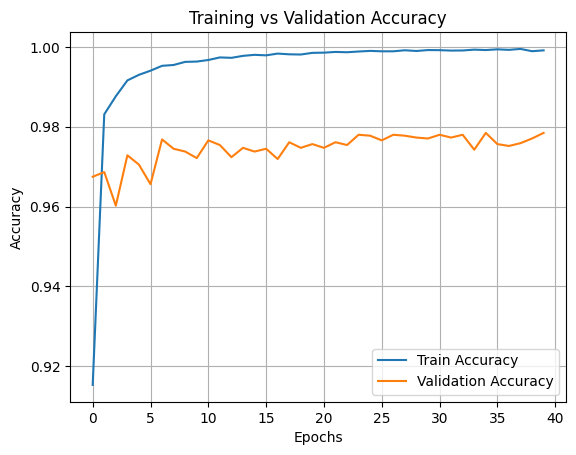

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step


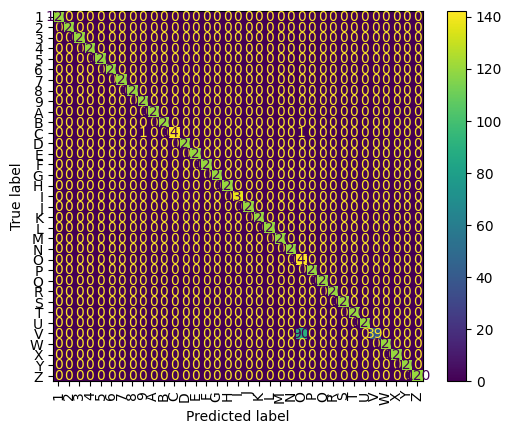

In [15]:
y_pred = np.argmax(model.predict(validation_generator), axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')
plt.show()


In [16]:
model.save('/content/my_isl_model.keras')
print("Model saved!")


Model saved!
